# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [7]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv

# Import NewsAPIClient
from newsapi import NewsApiClient

# Import nltk packages
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('punkt')

%matplotlib inline
load_dotenv()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nbaronti/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nbaronti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/nbaronti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
# Read your api key environment variable
api_key = os.getenv("News_API")

In [9]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [10]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="bitcoin", sort_by="relevancy", language="en", from_param='2022-01-01', to='2022-01-30')
bitcoin_articles

{'status': 'ok',
 'totalResults': 7210,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Gian M. Volpicelli',
   'title': 'As Kazakhstan Descends into Chaos, Crypto Miners Are at a Loss',
   'description': 'The central Asian country became No. 2 in the world for Bitcoin mining. But political turmoil and power cuts have hit hard, and the future looks bleak.',
   'url': 'https://www.wired.com/story/kazakhstan-cryptocurrency-mining-unrest-energy/',
   'urlToImage': 'https://media.wired.com/photos/61de2d453e654a13e9a16ef0/191:100/w_1280,c_limit/Business_Kazakhstan-2HDE52K.jpg',
   'publishedAt': '2022-01-12T12:00:00Z',
   'content': 'When Denis Rusinovich set up cryptocurrency mining company Maveric Group in Kazakhstan in 2017, he thought he had hit the jackpot. Next door to China and Russia, the country had everything a Bitcoin … [+4140 chars]'},
  {'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Mitchell Clark',
   'title': 'The International Mon

In [13]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(q="ethereum", sort_by="relevancy", language="en", from_param='2022-01-01', to='2022-01-30')
ethereum_articles

{'status': 'ok',
 'totalResults': 3329,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Corin Faife',
   'title': 'Crypto.com admits over $30 million stolen by hackers',
   'description': 'Cryptocurrency exchange Crypto.com has said that $15 million in ethereum and $18 million in bitcoin were stolen by hackers in a security breach',
   'url': 'https://www.theverge.com/2022/1/20/22892958/crypto-com-exchange-hack-bitcoin-ethereum-security',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDPEFG7LYrUz0O3g=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8921023/acastro_bitcoin_2.jpg',
   'publishedAt': '2022-01-20T13:23:31Z',
   'content': 'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars]'},
  {'source': {'id': None, 'name': 'Gizmodo.com'},
   'author

In [11]:
# Print total Bitcoin articles
print(f"Total articles about Bitcoin: {bitcoin_articles['totalResults']}")

# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu 
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

bitcoin_df

Total articles about Bitcoin: 7210


,date,text,compound,positive,negative,neutral
0,2022-01-12,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000
1,2022-01-25,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895
2,2022-01-14,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917
3,2022-01-27,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871
4,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000
5,2022-01-22,"Bitcoin, the largest digital asset, extended i...",0.3612,0.068,0.000,0.932
6,2022-01-14,Block founder Jack Dorsey has announced on Twi...,-0.4404,0.000,0.083,0.917
7,2022-01-14,Tesla Inc (TSLA.O) will accept the meme-based ...,0.3818,0.073,0.000,0.927
8,2022-01-20,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948
9,2022-01-26,British entrepreneur and financier Richard ODe...,0.6808,0.185,0.000,0.815


In [14]:
# Print total ethereum articles
print(f"Total articles about Ethereum: {ethereum_articles['totalResults']}")

# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu 
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)
ethereum_df

Total articles about Ethereum: 3329


,date,text,compound,positive,negative,neutral
0,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000
1,2022-01-19,Hackers who made off with roughly $15 million ...,0.0000,0.000,0.000,1.000
2,2022-01-20,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948
3,2022-01-21,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.000,0.962
4,2022-01-20,Trading platform Crypto.com lost about $34 mil...,-0.1027,0.056,0.067,0.877
5,2022-01-18,Ethereum is a digital platform that runs on bl...,0.4019,0.085,0.000,0.915
6,2022-01-11,Investors interest and growing cryptocurrency ...,0.7579,0.217,0.000,0.783
7,2022-01-20,Crypto bros never tire of sharing their utopia...,-0.0557,0.041,0.047,0.911
8,2022-01-19,The crypto market's whiplash volatility can ma...,0.5574,0.129,0.000,0.871
9,2022-01-20,"TO BELIEVERS, OPEN, public blockchains provide...",0.4215,0.106,0.000,0.894


In [15]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.023445,0.054350,0.037900,0.907750
std,0.358595,0.058267,0.043444,0.065598
min,-0.440400,0.000000,0.000000,0.765000
25%,-0.331550,0.000000,0.000000,0.875500
50%,0.000000,0.048500,0.000000,0.917000
75%,0.284450,0.081000,0.083250,0.942000
max,0.680800,0.185000,0.101000,1.000000


In [16]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.226805,0.067250,0.008700,0.924000
std,0.282338,0.068319,0.021502,0.073185
min,-0.102700,0.000000,0.000000,0.783000
25%,0.000000,0.000000,0.000000,0.875500
50%,0.089950,0.049000,0.000000,0.931500
75%,0.430825,0.111750,0.000000,1.000000
max,0.757900,0.217000,0.067000,1.000000


### Questions:

**Question 1**: Which coin had the highest mean positive score?

- **Answer**: Ethereum had the highest mean positive score of 0.067

**Question 2**: Which coin had the highest compound score?

- **Answer**: Ethereum had the highest mean compound score of 0.23 and highest max compound score of .76

**Question 3**: Which coin had the highest positive score?

- **Answer**: Ethereum had the highest max positive score of 0.217

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [106]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords using NLTK
sw = set(stopwords.words('english'))

# Append to stop word list
sw_addon = {'ha', 'el', 'char'}
sw = sw.union(sw_addon)

In [117]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and remove stop words
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    return output

In [118]:
# Create a new tokens column for Bitcoin
bitcoin_df["text_tokenized"] = bitcoin_df.apply(lambda row: tokenizer(row["text"]),axis=1)
bitcoin_df

,date,text,compound,positive,negative,neutral,text_tokenized
0,2022-01-12,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000,"[denis, rusinovich, set, cryptocurrency, minin..."
1,2022-01-25,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895,"[salvador, introduced, bitcoin, legal, tender,..."
2,2022-01-14,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917,"[officially, building, open, bitcoin, mining, ..."
3,2022-01-27,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871,"[israeli, national, tal, prihar, pled, guilty,..."
4,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000,"[new, blog, post, company, said, eth, bitcoin,..."
5,2022-01-22,"Bitcoin, the largest digital asset, extended i...",0.3612,0.068,0.000,0.932,"[bitcoin, largest, digital, asset, extended, d..."
6,2022-01-14,Block founder Jack Dorsey has announced on Twi...,-0.4404,0.000,0.083,0.917,"[block, founder, jack, dorsey, announced, twit..."
7,2022-01-14,Tesla Inc (TSLA.O) will accept the meme-based ...,0.3818,0.073,0.000,0.927,"[tesla, inc, tslao, accept, memebased, cryptoc..."
8,2022-01-20,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948,"[level, new, mayor, simply, employing, ageold,..."
9,2022-01-26,British entrepreneur and financier Richard ODe...,0.6808,0.185,0.000,0.815,"[british, entrepreneur, financier, richard, od..."


In [119]:
# Create a new tokens column for Ethereum
ethereum_df["text_tokenized"] = ethereum_df.apply(lambda row: tokenizer(row["text"]),axis=1)
ethereum_df

,date,text,compound,positive,negative,neutral,text_tokenized
0,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000,"[new, blog, post, company, said, eth, bitcoin,..."
1,2022-01-19,Hackers who made off with roughly $15 million ...,0.0000,0.000,0.000,1.000,"[hackers, made, roughly, million, ethereum, cr..."
2,2022-01-20,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948,"[level, new, mayor, simply, employing, ageold,..."
3,2022-01-21,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.000,0.962,"[back, september, robinhood, announced, plan, ..."
4,2022-01-20,Trading platform Crypto.com lost about $34 mil...,-0.1027,0.056,0.067,0.877,"[trading, platform, cryptocom, lost, million, ..."
5,2022-01-18,Ethereum is a digital platform that runs on bl...,0.4019,0.085,0.000,0.915,"[ethereum, digital, platform, run, blockchain,..."
6,2022-01-11,Investors interest and growing cryptocurrency ...,0.7579,0.217,0.000,0.783,"[investors, interest, growing, cryptocurrency,..."
7,2022-01-20,Crypto bros never tire of sharing their utopia...,-0.0557,0.041,0.047,0.911,"[crypto, bros, never, tire, sharing, utopian, ..."
8,2022-01-19,The crypto market's whiplash volatility can ma...,0.5574,0.129,0.000,0.871,"[crypto, market, whiplash, volatilitycan, make..."
9,2022-01-20,"TO BELIEVERS, OPEN, public blockchains provide...",0.4215,0.106,0.000,0.894,"[believers, open, public, blockchains, provide..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [120]:
from collections import Counter
from nltk import ngrams

In [121]:
# Create bigram counter function
def bigram_counter(text):
    bigram_counts = Counter(ngrams(text, n=2))
    bigram = dict(bigram_counts.most_common(10))
    return bigram

In [122]:
# Generate the Bitcoin N-grams where N=2
btc_string = ' '.join(bitcoin_df["text"])
btc_string_tokenized = tokenizer(btc_string)

btc_string_bigram_counter = bigram_counter(btc_string_tokenized)
btc_string_bigram_counter

{('bitcoin', 'mining'): 4,
 ('alex', 'castro'): 3,
 ('building', 'open'): 3,
 ('open', 'bitcoin'): 3,
 ('mining', 'system'): 3,
 ('blog', 'post'): 3,
 ('alongside', 'us'): 2,
 ('illustration', 'alex'): 2,
 ('international', 'monetary'): 2,
 ('officially', 'building'): 2}

In [145]:
# Generate the Ethereum N-grams where N=2
eth_string = ' '.join(ethereum_df["text"])
eth_string_tokenized = tokenizer(eth_string)

eth_string_bigram_counter = bigram_counter(eth_string_tokenized)
eth_string_bigram_counter

{('blog', 'post'): 3,
 ('new', 'blog'): 2,
 ('post', 'company'): 2,
 ('company', 'said'): 2,
 ('according', 'new'): 2,
 ('new', 'york'): 2,
 ('york', 'city'): 2,
 ('believers', 'open'): 2,
 ('open', 'public'): 2,
 ('public', 'blockchains'): 2}

In [124]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [125]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_string_tokenized, N=10)

[('bitcoin', 16),
 ('company', 9),
 ('cryptocurrency', 7),
 ('mining', 7),
 ('new', 6),
 ('open', 5),
 ('building', 4),
 ('salvador', 3),
 ('us', 3),
 ('illustration', 3)]

In [126]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_string_tokenized, N=10)

[('cryptocurrency', 9),
 ('ethereum', 8),
 ('new', 7),
 ('bitcoin', 6),
 ('company', 5),
 ('digital', 4),
 ('blockchains', 4),
 ('blog', 3),
 ('post', 3),
 ('said', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

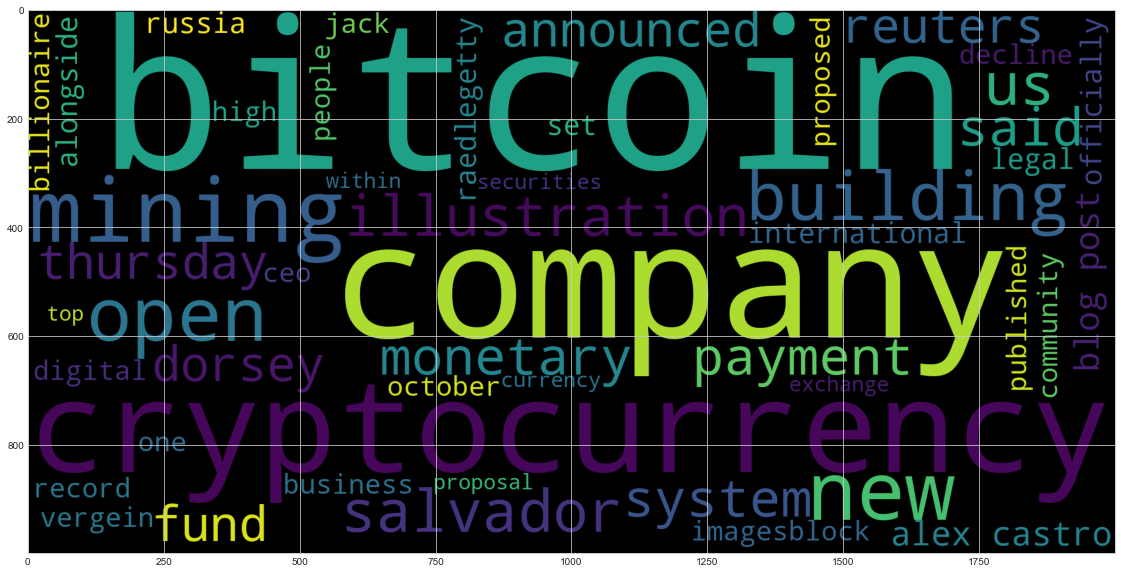

In [131]:
# Generate the Bitcoin word cloud
btc_cloud_text = ' '.join(btc_string_tokenized)
wc = WordCloud(width=2000, height=1000, max_words=50).generate(btc_cloud_text)
plt.figure(figsize=(20,10))
plt.imshow(wc);

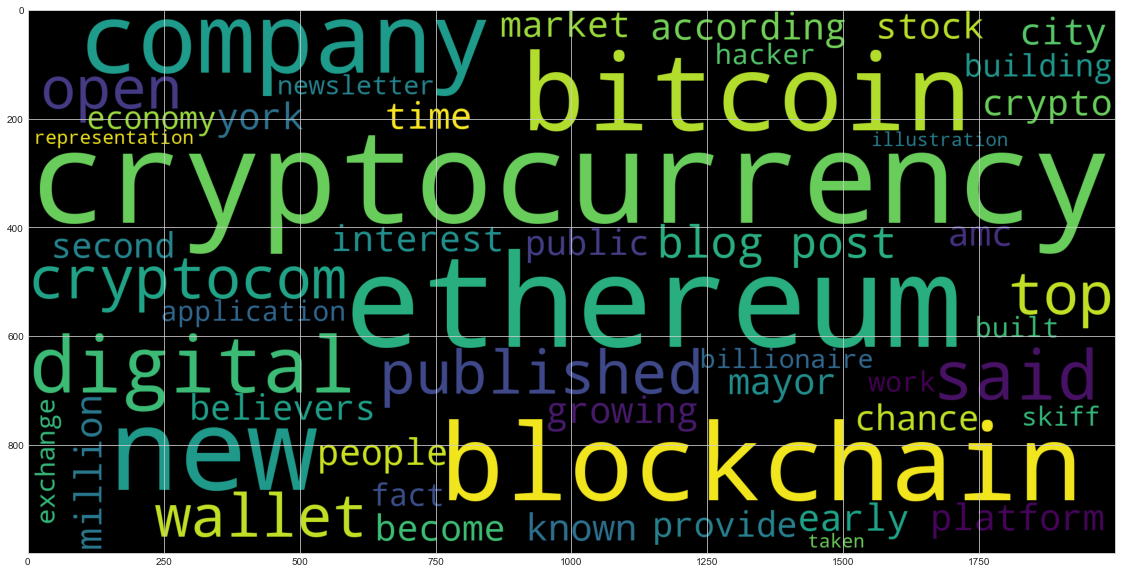

In [135]:
# Generate the Ethereum word cloud
eth_cloud_text = ' '.join(eth_string_tokenized)
wc = WordCloud(width=2000, height=1000, max_words=50).generate(eth_cloud_text)
plt.figure(figsize=(20,10))
plt.imshow(wc);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [136]:
import spacy
from spacy import displacy

In [137]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 10.5 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [138]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [67]:
# Concatenate all of the Bitcoin text together
btc_string = ' '.join(bitcoin_df["text"])
btc_string

'When Denis Rusinovich set up cryptocurrency mining company Maveric Group in Kazakhstan in 2017, he thought he had hit the jackpot. Next door to China and Russia, the country had everything a Bitcoin … [+4140 chars] El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge\r\n\n \n\n The International Monetary Fund’s executive board has recommended El … [+2691 chars] Were officially building an open Bitcoin mining system\r\nPhoto by Joe Raedle/Getty Images\r\nBlock, the payment company formerly known as Square, is working on building an open Bitcoin mining system, it… [+2078 chars] Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies \r\nIllustration by Alex Castro / The Verge\r\nIn the culmination of a two-year legal process, … [+1448 chars] In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn

In [141]:
# Run the NER processor on all of the text
btc_for_NER = nlp(btc_string)

# Add a title to the document
btc_for_NER.user_data["title"] = "BTC NER"

In [142]:
# Render the visualization
displacy.render(btc_for_NER, style='ent')

In [151]:
# List all Entities
entities = [ent.text for ent in btc_for_NER.ents]
entities

['Denis Rusinovich',
 'Maveric Group',
 'Kazakhstan',
 '2017',
 'China',
 'Russia',
 'El Salvador',
 'US',
 '2021',
 'Alex Castro',
 'Verge',
 'The International Monetary Fund’s',
 'El',
 'Bitcoin',
 'Joe Raedle/Getty Images',
 'Square',
 'Bitcoin',
 'Israeli',
 'Tal Prihar',
 'Illustration',
 'Alex Castro',
 'Verge',
 'two-year',
 '4,836',
 'ETH',
 '443',
 'Alex Castro',
 'Verge',
 'the early hours',
 'Thursday',
 'morning',
 'Saturday',
 'more than 50%',
 'November',
 'more than $',
 'Jack Dorsey',
 'Twitter',
 'first',
 'October last year',
 'the "Giga Texas',
 'Elon Musk',
 'Friday',
 'Fintech',
 'New York City',
 'British',
 'Richard ODell',
 'house',
 'October',
 'Poulde',
 'Russia',
 'Thursday',
 'Russian',
 'Bitcoin',
 'El Salvador',
 'US',
 'The International Monetary Fund',
 'El Salvador',
 'Changpeng',
 'Binance',
 'Reuters',
 'Jan 26',
 'Reuters',
 'The U.S. Securities and Exchange Commission',
 'Thursday',
 'ETF',
 'Fidelitys Wise Origin Bitcoin',
 '+202',
 'Jack Dorsey',


---

### Ethereum NER

In [147]:
# Concatenate all of the Ethereum text together
eth_string = ' '.join(ethereum_df["text"])
eth_string

'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars] Hackers who made off with roughly $15 million in ethereum from Crypto.com are attempting to launder the funds through a so-called ethereum mixer, known as Tornado Cash, according to a new report from… [+3891 chars] On some level, the new mayor is simply employing an age-old political strategy: making overtures to the business community. Fintech is a growing field in New York City, and blockchain-based companies… [+1562 chars] Back in September\r\n, Robinhood announced plans to test a cryptocurrency wallet within its app. At the time, the company said it would open the beta to a small number of people before expanding availa… [+1069 chars] Trading platform Crypto.com lost about $34 million worth of cryptocurrency in a hack on Monday, according to a new blog post by the c

In [148]:
# Run the NER processor on all of the text
eth_for_NER = nlp(eth_string)

# Add a title to the document
eth_for_NER.user_data["title"] = "ETH NER"

In [149]:
# Render the visualization
displacy.render(eth_for_NER, style='ent')

In [152]:
# List all Entities
entities = [ent.text for ent in eth_for_NER.ents]
entities

['4,836',
 'ETH',
 '443',
 'Alex Castro',
 'Verge',
 'the early hours',
 'Thursday',
 'morning',
 'roughly $15 million',
 'Crypto.com',
 'Tornado Cash',
 'Fintech',
 'New York City',
 'September',
 'Robinhood',
 'Crypto.com',
 'about $34 million',
 'Monday',
 'Ethereum',
 'Ethereum',
 '418%',
 '2021',
 'AMC Entertainment',
 'AMC',
 'GME',
 'Ethereums',
 'more than 650%',
 'Vitalik Buterin',
 'Ethereum',
 'OPEN',
 'second',
 'OPEN',
 'second',
 'Bloomberg TV',
 'Crypto.com',
 'Kris Marszalek',
 '400',
 'British',
 'Richard ODell',
 'house',
 'October',
 'Poulde',
 'TIME',
 'weekly',
 'Vita',
 'New York City',
 'Eric Adams',
 'first',
 'Friday',
 'Bitcoin and Ethereum',
 'Coinbase Global Inc.',
 'U.S.',
 'early December 2021',
 'Skiff',
 'MetaMask',
 'Skiff',
 'Bitcoin',
 'January 8, 2021',
 'REUTERS',
 'Dado Ruvic/File PhotoJan',
 '21',
 'Reuters',
 '9.28%',
 '36',
 'Bitcoin, Ethereum',
 'DogeCoin',
 'June 29, 2021',
 'REUTERS',
 'Dado Ruvic/Illustration',
 'MOSCOW',
 'Jan',
 'Fed',
 'C

---